## sourmash `--track-abundance` stuff

You'll need to install the latest sourmash branch `feature/abundance` for this -- something like

```
pip install git+https://github.com/dib-lab/sourmash.git@feature/abundance
```

should work if you're using a virtualenv.

In [1]:
%matplotlib inline

In [2]:
import numpy
from sourmash_lib import fig

In [3]:
# compare signatures, IGNORING abundance (default behavior of sourmash)
!sourmash compare *.1.fq.sig -o noabund --ignore-abundance > out2

# running sourmash subcommand: compare
loading 0Hour_ATCACG_L002001.1.fq.sig
loading 0Hour_ATCACG_L002002.1.fq.sig
loading 0Hour_ATCACG_L002003.1.fq.sig
loading 0Hour_ATCACG_L002004.1.fq.sig
loading 0Hour_ATCACG_L002005.1.fq.sig
loading 12Hour_TTAGGC_L002001.1.fq.sig
loading 12Hour_TTAGGC_L002002.1.fq.sig
loading 12Hour_TTAGGC_L002003.1.fq.sig
loading 12Hour_TTAGGC_L002004.1.fq.sig
loading 18Hour_TGACCA_L002001.1.fq.sig
loading 18Hour_TGACCA_L002002.1.fq.sig
loading 18Hour_TGACCA_L002003.1.fq.sig
loading 18Hour_TGACCA_L002004.1.fq.sig
loading 18Hour_TGACCA_L002005.1.fq.sig
loading 18Hour_TGACCA_L002006.1.fq.sig
loading 18Hour_TGACCA_L002007.1.fq.sig
loading 18Hour_TGACCA_L002008.1.fq.sig
loading 24HourA_ACAGTG_L002001.1.fq.sig
loading 24HourA_ACAGTG_L002002.1.fq.sig
loading 24HourA_ACAGTG_L002003.1.fq.sig
loading 24HourA_ACAGTG_L002004.1.fq.sig
loading 24HourA_ACAGTG_L002005.1.fq.sig
loading 24HourA_ACAGTG_L002006.1.fq.sig
loading 24HourA_ACAGTG_L002007.1.fq.sig
loading 24HourA_ACAGTG_

In [4]:
# compare signatures, now WITH abundance (signatures computed with `sourmash compute --track-abundance`)
!sourmash compare *.1.fq.sig -o abund > out

# running sourmash subcommand: compare
loading 0Hour_ATCACG_L002001.1.fq.sig
loading 0Hour_ATCACG_L002002.1.fq.sig
loading 0Hour_ATCACG_L002003.1.fq.sig
loading 0Hour_ATCACG_L002004.1.fq.sig
loading 0Hour_ATCACG_L002005.1.fq.sig
loading 12Hour_TTAGGC_L002001.1.fq.sig
loading 12Hour_TTAGGC_L002002.1.fq.sig
loading 12Hour_TTAGGC_L002003.1.fq.sig
loading 12Hour_TTAGGC_L002004.1.fq.sig
loading 18Hour_TGACCA_L002001.1.fq.sig
loading 18Hour_TGACCA_L002002.1.fq.sig
loading 18Hour_TGACCA_L002003.1.fq.sig
loading 18Hour_TGACCA_L002004.1.fq.sig
loading 18Hour_TGACCA_L002005.1.fq.sig
loading 18Hour_TGACCA_L002006.1.fq.sig
loading 18Hour_TGACCA_L002007.1.fq.sig
loading 18Hour_TGACCA_L002008.1.fq.sig
loading 24HourA_ACAGTG_L002001.1.fq.sig
loading 24HourA_ACAGTG_L002002.1.fq.sig
loading 24HourA_ACAGTG_L002003.1.fq.sig
loading 24HourA_ACAGTG_L002004.1.fq.sig
loading 24HourA_ACAGTG_L002005.1.fq.sig
loading 24HourA_ACAGTG_L002006.1.fq.sig
loading 24HourA_ACAGTG_L002007.1.fq.sig
loading 24HourA_ACAGTG_

In [5]:
# compute similarities from salmon output
!./distance.py *.counts.gz -o salmon

reading: 0Hour_ATCACG_L002001.quant.counts.gz
reading: 0Hour_ATCACG_L002002.quant.counts.gz
reading: 0Hour_ATCACG_L002003.quant.counts.gz
reading: 0Hour_ATCACG_L002004.quant.counts.gz
reading: 0Hour_ATCACG_L002005.quant.counts.gz
reading: 12Hour_TTAGGC_L002001.quant.counts.gz
reading: 12Hour_TTAGGC_L002002.quant.counts.gz
reading: 12Hour_TTAGGC_L002003.quant.counts.gz
reading: 12Hour_TTAGGC_L002004.quant.counts.gz
reading: 18Hour_TGACCA_L002001.quant.counts.gz
reading: 18Hour_TGACCA_L002002.quant.counts.gz
reading: 18Hour_TGACCA_L002003.quant.counts.gz
reading: 18Hour_TGACCA_L002004.quant.counts.gz
reading: 18Hour_TGACCA_L002005.quant.counts.gz
reading: 18Hour_TGACCA_L002006.quant.counts.gz
reading: 18Hour_TGACCA_L002007.quant.counts.gz
reading: 18Hour_TGACCA_L002008.quant.counts.gz
reading: 24HourA_ACAGTG_L002001.quant.counts.gz
reading: 24HourA_ACAGTG_L002002.quant.counts.gz
reading: 24HourA_ACAGTG_L002003.quant.counts.gz
reading: 24HourA_ACAGTG_L002004.quant.counts.gz
reading: 24Hou

## MinHash signatures of mRNAseq data, w/o abundance tracking 

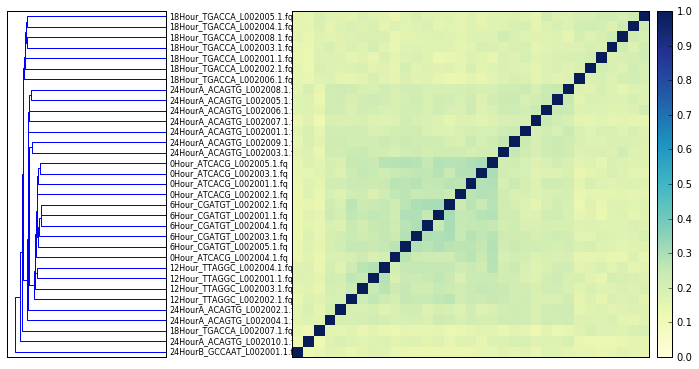

In [6]:
D2, labels2 = fig.load_matrix_and_labels('noabund')
_ = fig.plot_composite_matrix(D2, labels2)

## MinHash signatures of mRNAseq data, with abundance tracking

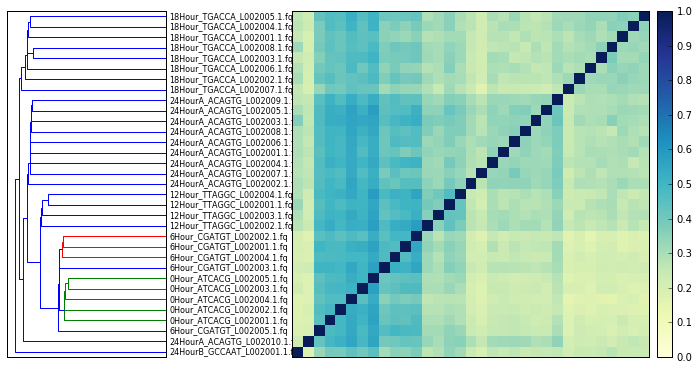

In [7]:
D, labels = fig.load_matrix_and_labels('abund')
_ = fig.plot_composite_matrix(D, labels)

## Salmon quantification of the same data sets

Here we are using dot products between the vectors of salmon output to quantify distance. (Note changed min scale.)

0.949106776371 1.0


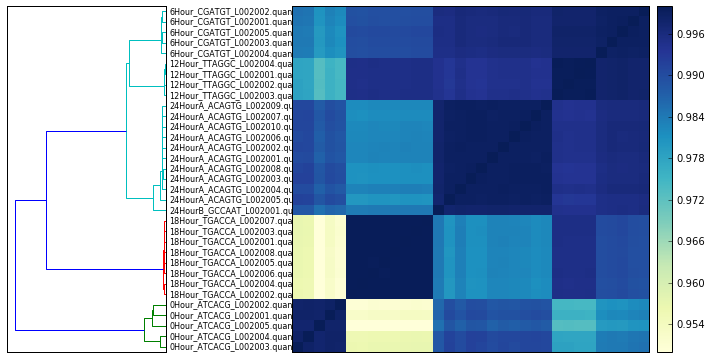

In [8]:
salmon, salmon_labels = fig.load_matrix_and_labels('salmon')
print(numpy.min(salmon), numpy.max(salmon))
_ = fig.plot_composite_matrix(salmon, salmon_labels, vmin=0.95)

## Ordination attempt on the 'abund' MinHash results

In [9]:
from skbio import DistanceMatrix
from skbio.stats.ordination import pcoa

In [10]:
# make a symmetric distance matrix
Dsym = 1- (D + D.T) / 2.0
dm = DistanceMatrix(Dsym, labels)

# do a PCoA
pcoa_results = pcoa(dm)

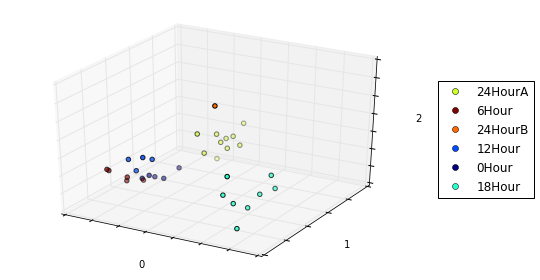

In [11]:
# plot, colored by timepoint.
import pandas as pd
d = {}
for l in labels:
    d[l] = { 'timepoint': l.split('_')[0] }

df = pd.DataFrame.from_dict(d, orient='index')
_ = pcoa_results.plot(df=df, column='timepoint')